In [1]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
data = pd.read_csv("Dataset/testRaw3.csv") 

# Preview the first 5 lines of the loaded data 
data.head()

,id,dt,accel_x,accel_y,accel_z,accel_angle_x,accel_angle_y,accel_angle_z,angle_x,angle_y,angle_z
0,0,0.000,-12545.74,6380.59,8816.0,21.22,50.23,0.0,22.25,48.52,75.61
1,1,0.030,-12557.74,6428.59,8900.0,22.67,48.85,0.0,22.27,48.51,75.62
2,2,0.031,-12421.74,6400.59,8936.0,22.70,48.50,0.0,22.26,48.50,75.63
3,3,0.029,-12361.74,6440.59,8952.0,22.88,48.27,0.0,22.26,48.52,75.59
4,4,0.031,-12485.73,6312.59,8964.0,22.33,48.72,0.0,22.22,48.56,75.56


In [2]:
# for i in data['accel_x']:
#     print(i)

In [3]:
# data['accel_x']=(data['accel_x']-min(data['accel_x']))/(max(data['accel_x']) - min(data['accel_x']))
# data['accel_y']=(data['accel_y']-min(data['accel_y']))/(max(data['accel_y']) - min(data['accel_y']))

In [4]:
# for i in data['accel_x']:
#     print(i)

In [5]:
# data['angle_x']=(data['angle_x']-min(data['angle_x']))/(max(data['angle_x']) - min(data['angle_x']))
# data['angle_y']=(data['angle_y']-min(data['angle_y']))/(max(data['angle_y']) - min(data['angle_y']))

In [6]:
# for i in data['angle_x']:
#     print(i)

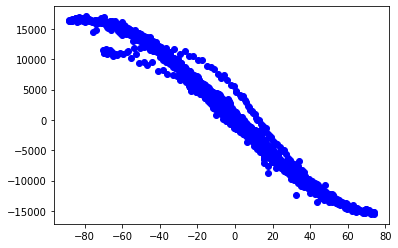

alpha = -72.5679925370539
beta = -248.11063355400663


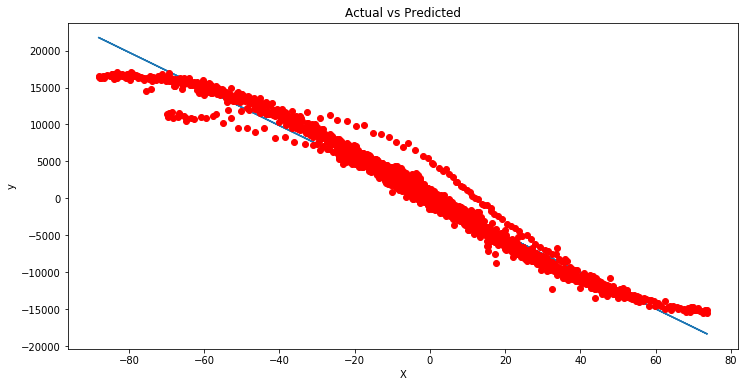

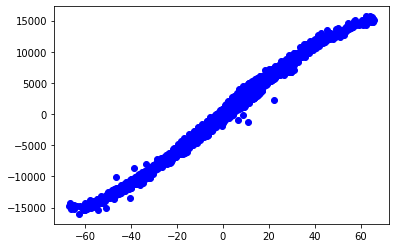

alpha = 143.46921380954927
beta = 270.14602457437127


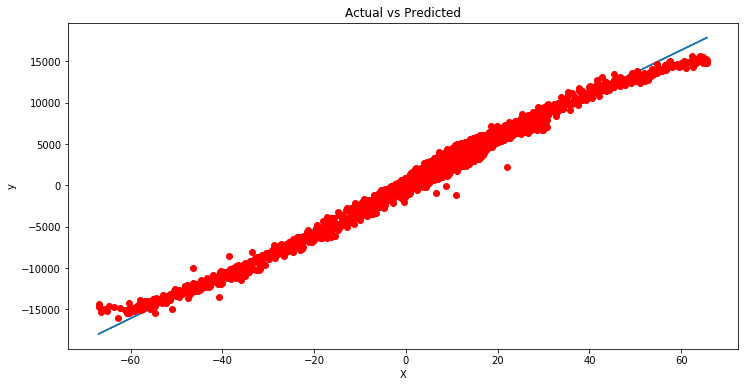

In [2]:
for x,y in [[data['angle_y'], data['accel_x']],[data['angle_x'], data['accel_y']]]:
    plt.plot(x, y, 'o', color='blue');
    plt.show()
    #ref: https://towardsdatascience.com/introduction-to-linear-regression-in-python-c12a072bedf0
    df = pd.DataFrame(
        {'X': x,
         'y': y}
    )

    # Calculate the mean of X and y
    xmean = np.mean(x)
    ymean = np.mean(y)

    # Calculate the terms needed for the numator and denominator of beta
    df['xycov'] = (df['X'] - xmean) * (df['y'] - ymean)
    df['xvar'] = (df['X'] - xmean)**2

    # Calculate beta and alpha
    beta = df['xycov'].sum() / df['xvar'].sum()
    alpha = ymean - (beta * xmean)
    print(f'alpha = {alpha}')
    print(f'beta = {beta}')
    
    ypred = alpha + beta * x
    plt.figure(figsize=(12, 6))
    plt.plot(x, ypred)     # regression line
    plt.plot(x, y, 'ro')   # scatter plot showing actual data
    plt.title('Actual vs Predicted')
    plt.xlabel('X')
    plt.ylabel('y')

    plt.show()

In [13]:
# x = data['accel_z']
# y = data['angle_x']
# plt.plot(x, y, 'o', color='blue');

In [14]:
# x = data['accel_z']
# y = data['angle_y']
# plt.plot(x, y, 'o', color='blue');

In [14]:
# may be improve with polynomial regression degree=3
# https://towardsdatascience.com/polynomial-regression-bbe8b9d97491